In [3]:
%load_ext autoreload
%autoreload 2

from PIL import Image
import numpy as np

### 1. Detection

In [4]:
from models.mtcnn import detect_faces, show_bboxes


In [6]:
img = Image.open('samples/nct_3.jpg')
bounding_boxes, landmarks = detect_faces(img)
#show_bboxes(img, bounding_boxes, landmarks)

In [8]:
landmarks

array([[428.0351 , 488.38806, 470.00137, 450.97086, 500.32672, 455.532  ,
        441.87625, 481.99176, 523.66296, 514.17395],
       [636.12177, 679.3703 , 677.75885, 660.0849 , 691.533  , 467.06464,
        453.69495, 487.71564, 518.562  , 507.35025]], dtype=float32)

### 2. SOD

In [4]:
from solov2 import nuki_faces

In [22]:
nuki_boxes = []
for bbox in bounding_boxes:
    x0, y0, x1, y1 = bbox[:4]
    xc = (x0+x1)/2
    yc = (y0+y1)/2
    w = (x1-x0)/2*2
    h = (y1-y0)/2
    nuki_boxes.append((int(xc-w), int(yc-h*2), int(xc+w), int(yc+h)))

In [23]:
masks = nuki_faces(img, nuki_boxes)


[01/15 23:39:14 detectron2]: Arguments: {'config_file': 'solov2/configs/SOLOv2/R50_3x.yaml', 'input': ['jsm.jpg'], 'output': 'results', 'confidence_threshold': 0.5, 'opts': ['MODEL.WEIGHTS', 'solov2/weights/SOLOv2_R50_3x.pth']}


### Replace my Face to target image

In [24]:
myimg = Image.open("jsm.jpg")
mymasks = nuki_faces(myimg, [(0,0,myimg.size[0], myimg.size[1])])
mynuki = np.asarray(myimg).copy() * np.expand_dims(mymasks[0], 2)

[01/15 23:39:35 detectron2]: Arguments: {'config_file': 'solov2/configs/SOLOv2/R50_3x.yaml', 'input': ['jsm.jpg'], 'output': 'results', 'confidence_threshold': 0.5, 'opts': ['MODEL.WEIGHTS', 'solov2/weights/SOLOv2_R50_3x.pth']}


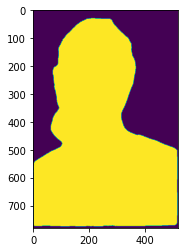

In [25]:
from matplotlib.pylab import plt
plt.imshow(mymasks[0])

### Show Results

In [26]:
from matplotlib.pylab import plt

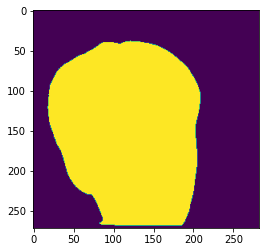

In [27]:
plt.imshow(masks[0])

In [28]:
result_img = np.asarray(img).copy()
for nbox, mask in zip(nuki_boxes, masks):
    x0,y0,x1,y1 = nbox[:4]
    result_img[int(y0):int(y0 + mask.shape[0]), int(x0):int(x0 + mask.shape[1]), :] *= np.expand_dims(mask, 2)

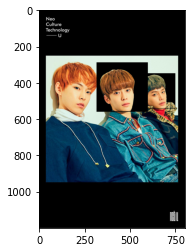

In [29]:
plt.imshow(result_img)